# Resources

https://datascience.quantecon.org/scientific/applied_linalg.html

https://www.3blue1brown.com/essence-of-linear-algebra-page

Programmer's intro to Mathematics book chapter 10

# Linear Algebra

Linear algebra is a field of mathematics which studies the **vector space**.

This is by far the most important field of mathematics for data science. So we're going to get to know it in more rigorous detail than other fields.

So strap in! Let's dive into linear algebra.

The widely used python package for linear algebra is **numpy**, which makes it easy to create a vector (AKA array):

In [1]:
import numpy as np

a = np.array([1, 2])
a

array([1, 2])

**Numpy** has huge advantages over the normal python `list` apart from having methods for linear algebra. It's very fast:

- numpy methods are implemented in the [C programming language](https://en.wikipedia.org/wiki/C_%28programming_language%29)

- numpy arrays are efficient in memory (RAM) usage. For numbers the objects are directly represented in terms of [bytes](https://en.wikipedia.org/wiki/Byte). This is largely because numpy arrays force all objects to have the same type.

(Don't worry about this for now -- we'll go over how computers work and how this relates to numpy being fast in a later lecture.)



In [2]:
# the data type of the array
# eg. the type of the objects in it
a.dtype

dtype('int64')

# Vectors

Vectors are powerful because they join concepts from many fields of mathematics. Geometry, statistics, and equation solving are some of the more important ones.

A vector is an array of numbers $X = [x_1, x_2, ..., x_n]$.

### Some notation

We normally talk about vectors in capital letters $X$ and the elements in the vectors in lowercase $x_i$ with the subscript numbers referring to their position in the vector. Notice how the subscript for element position is related to the brackets `a[i]` when programming with arrays.

### Vectors in practice

Most people are introduced to vectors in physics with $2d$ or $3d$ vectors 

Here, we plot the $2d$ vectors $[-3, 3], [2,4], [-4, -3.5]$:

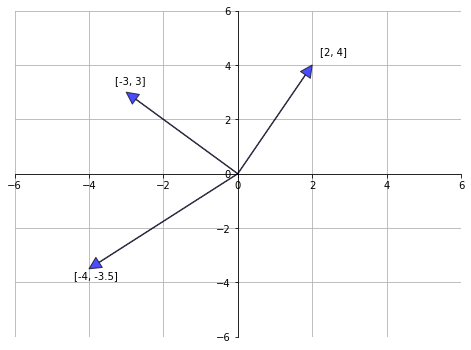

In [3]:
import matplotlib.pyplot as plt

def draw_vectors(vecs):
  """
  Pretty vector plots 
  Input is a list (or array) of 2d vectors
  eg. [[1,2], [3,4], [5,6]]
  """
  fig, ax = plt.subplots(figsize=(8, 6))
  # Set the axes through the origin
  for spine in ['left', 'bottom']:
      ax.spines[spine].set_position('zero')
  for spine in ['right', 'top']:
      ax.spines[spine].set_color('none')
  maxval = np.max(vecs) * 1.5
  minval = np.min(vecs) * 1.5
  ax.set(xlim=(minval, maxval), ylim=(minval, maxval))
  ax.grid()
  for v in vecs:
      ax.annotate(
          '', xy=v, 
          xytext=(0, 0),
          arrowprops=dict(
              facecolor='blue', 
              width=0.5,
              shrink=0, alpha=0.7,
          )
      )
      # Put text a bit after the arrow
      ax.text(1.1 * v[0], 
              1.1 * v[1], 
              str(v)
      )
  return fig, ax

draw_vectors(
  [[2, 4], 
  [-3, 3], 
  [-4, -3.5]]
)
plt.show()

## Vectors are both functions and containers

You can think of these three vectors as functions. For a $2d$ vector $[x_1, x_2]$, it says: 

*From the origin, walk along the x-axis by $x_1$ and walk along the y-axis by $x_2$*

We can also think of the vectors as normal mathematical objects on which we apply normal operations. In this case, we can think of $[x_1, x_2]$ as simply the point at those coordinates.

Note the different ways to think about it! One says "from the origin, this is how to get to the point" and the other says "the point is there". 

The same concept can be seen in different viewpoints, and because linear algebra rejoins so many areas of math, it's useful to step back and appreciate the same thing from many perspectives when you can.

# Vectors: formal definition

Let's formally define a vector space (the mathematical set that contains possible vector objects).

**Definition:** A set $V$ is called a *vector space* over $\mathbb{R}$ if it has two operations: $+$ and $\cdot$ and the following propreties:

1. The function $\cdot : \mathbb{R} \times V \rightarrow V$ maps a real number and a vector to a vector. The values in $\mathbb{R}$ are called *scalars* an we call the operation $\cdot$ *scaling*

2. The function $+: V \times V \rightarrow V$ functions on pairs of vectors. We'll normally write it down normally $V_1 + V_2$.

3. There is a distinguished, unique vector denoted $0$ in $V$ 

4. $+$ obeys the following propreties for every $u,v,w\in V$:

  a. $v+w=w+v$  
  b. $(u+v)+w=u+(v+w)$  
  c. $0+u=u+0=u$  
  d. $u+(-u)=(-u)+u=0$  

5. $\cdot$ obeys the following:

  a. $0\cdot v = \mathbf{0}$. Note $\mathbf{0}$ is the *zero vector*  
  b.  $1\cdot v = v$
  c. $a\cdot (u\cdot v) = (a\cdot u) \cdot v$

6. $+$ and $\cdot$ distribute over each other like normal multiplication and addition:

  a. $a·(v+w)=a·v+a·w$
  b. $(a+b)·v= a · v + b · v$

Any object that respects these 6 conditions will hold up to everything we study in linear algebra.

Note from #5 that the dot product $a\cdot b$ in linear algebra is **not commutative**! So the following proprety **is possible** in general:

$$u\cdot v \neq v \cdot u $$

This means that *the order in which we multiply objects matters* when it comes to linear algebra

In [4]:
# Order matters when multiplying two matrices

# 2x3 matrix
a = np.array(
    [[1,2,3], 
     [4,5,6]]
)
# 3x2 matrix
b = np.array(
    [[4,5], 
     [6,7], 
     [8,9]]
)

print("AxB: \n", a.dot(b))
print("BxA: \n", b.dot(a))

AxB: 
 [[ 40  46]
 [ 94 109]]
BxA: 
 [[24 33 42]
 [34 47 60]
 [44 61 78]]


# Some example of vector spaces

### 1. Real Numbers

Real numbers respect the 6 rules above with the intuitive $+$ operation (addition) and with the dot product $\cdot$ being multiplication. 

The number zero is both the scalar identity and the zero vector. Nothing about this should be too surprising.


### 2. Polynomials

If you take a polynomial of degree $n$, so it's an equation of the form:

$$f(x) = a_1 + a_2 x + a_3 x^2 + ... + a_n x^n$$

Notice the structure of the equation is always the same. All that matters is the coefficients $a_1, ..., a_n$. So we can rearrange the coefficients as a vector $[a_1, ..., a_n]$.

For example, the equation $f(x) = 5 + 7x^2$ would be represented as the vector $[5, 0, 7]$

Later on this lecture we'll use this fact to do some cool applications.


### 3. Vectors of real numbers

Vectors of numbers are the main thing we're interested in. **All other objects compatible with linear algebra can be re-cast as vectors of numbers**, so we'll go into loving detail as to how these vectors work.

Formally, we care about vectors in $\mathbb{R}^n$, so vectors of $n$ real numbers. Here the zero vector is $[0,0,...,0]$ which is the origin on a graph.

# Scaling a vector 

Let's go through the definitions. First is multiplying a vector by a scalar. This is also called **scaling** because it doesn't change the direction of the vector, but it changes the **scale**:

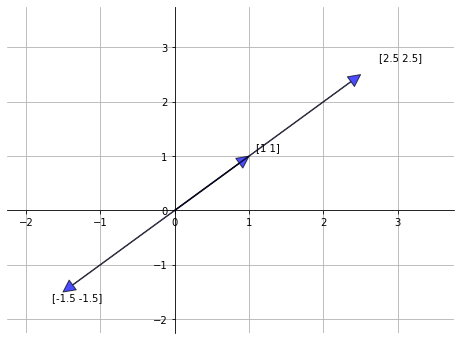

In [5]:
basis = np.array([1,1])

draw_vectors(
    [basis,
     basis*2.5,
     basis*-1.5]
)
plt.show()

All the vectors are on the same "line", even the one with the direction reversed (multiplying by a negative number).


**Note:** numpy supports these operatiosn directly. The equivalent loop for scalar multiplication in python would be:

```python
for i in vec:
  vec[i] *= scalar
```

# Addition

Addition on vectors works element-by-element.

$$\begin{bmatrix} y_1\\ y_2\\ ... \\ y_n \end{bmatrix}
+
\begin{bmatrix} x_1\\ x_2\\ ... \\ x_n \end{bmatrix}
=
\begin{bmatrix} y_1 + x_1\\ y_2 + x_2\\ ... \\ y_n + x_n \end{bmatrix}
$$

This creates new vectors with a new orientation:

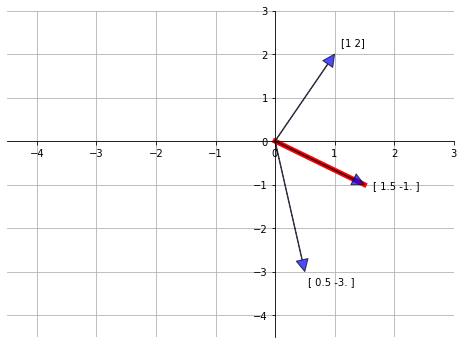

In [6]:
a = np.array([1,2])
b = np.array([0.5, -3])


# Draw shift between b being drawn at A's end
fig, ax = draw_vectors([a, b, a+b])
plt.plot([0, (a+b)[0]], [0, (a+b)[1]], color='r', linewidth=5)
plt.show()

The way to see this geometrically, is that by adding a vector to an other, we are "appending" it to the end of the other.

We can see this in $a+b=v$ because the difference the vector $a$ and the result $v$ is a translation (translation is sliding the object around while keeping the scale and orientation the same) of $b$:

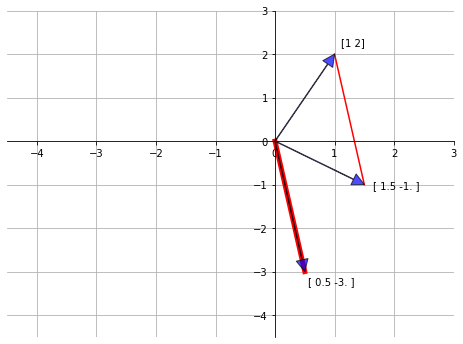

In [7]:
fig, ax = draw_vectors([a, b, a+b])
plt.plot([a[0], (a+b)[0]], [a[1], (a+b)[1]], color='r')
plt.plot([0, b[0]], [0, b[1]], color='r', linewidth=5)
plt.show()

In [8]:
#### Exercise:
#### Speeds of a car?

# Dot Product

Finally, we get to define the dot product $A \cdot B$ operation between two vectors of numbers.

$$ A \cdot B = \sum_{i=1}^n a_i b_i$$

In [9]:
### Exercise:  (5-15)
### Dot Product -- should be equal to a.dot(b)


### Answer (canonical)
def dot(a, b):
  res = 0
  for i in range(len(a)):
    res += a[i] * b[i]
  return res

### Lambda alternative
dot = lambda a,b : sum([a[i]*b[i] for i in range(len(a))])

### cheating answer if a & b are np.arrays
dot = lambda a,b : sum(a * b)

Note that the dot product is also sometimes called the *inner product* and it's also sometimes denoted with the angular brackets $⟨v, w⟩ = v \cdot w$

This dot product formula is special because it has a geometric interpretation.

First let's relate it to the length of a vector.

# Norm

We call the length of a vector its **norm** and denote it $||v||$. For a 2d vector we can use [pythagora's theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem) to get the length by constructing a right-angled triangle around the vector on the x and y axis.


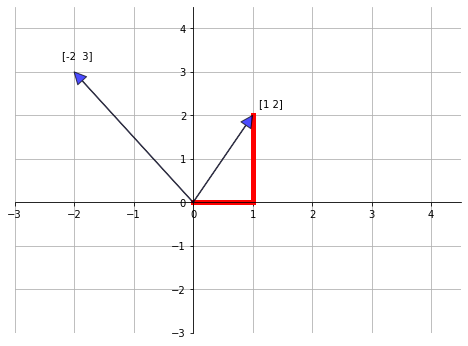

In [10]:
a = np.array([1,2])
b = np.array([-2,3])

fig, ax = draw_vectors([a, b])
plt.plot([0, a[0]], [0, 0], color='r', linewidth=5)
plt.plot([a[0], a[0]], [0, a[1]], color='r', linewidth=5)
plt.show()

Pythagoras states that $a^2 + b^2 = c^2$ so we can get the length $c$ of our vector from the $x$ and $y$ components by

$$||v|| = \sqrt{x^2 + y^2}$$

If we take a single vector, then notice its dot product with itself is equal to this the interior part Pythagoras formula:

$$||v|| = \sqrt{x^2 + y^2} = \sqrt{\sum_{i=1}^n a_i a_i} = \sqrt{\sum_{i=1}^n a_i^2} = \sqrt{v\cdot v}$$

Note that this is true in 3d and in higher dimensions, too. The dot product of a vector with itself will return its length.

In [11]:
a = np.array([1,0,1,0,1])
a.dot(a) # dot product is the length of the vector

3

# Angles between vectors

The inner product $⟨v, w⟩$ between two vectors is equal to $||v||\ ||w|| cos(θ)$ where $θ$ is the angle between the two vectors

In [12]:
### Exercise: (5-10min) Get the angle between two vectors
### using the dot product 
### (you can use numpy's dot product)
### Hint: find the function which is the inverse of cos

### Solution:
### Shift the equation around!
def angle(a, b):
  return np.arccos(a.dot(b) / (a.dot(a) * b.dot(b)))

# Orthogonality

**AKA perpendicular, right angle, etc.**

Two nonzero vectors $v, w ∈ \mathbb{R}^n$ are perpendicular if and only if $⟨v, w⟩ = 0$ or one of the two vectors is the zero vector.

In [14]:
np.array([0,1]).dot(np.array([1, 0]))

0

# Dimensions

We call the number of possible orthogonal components in a vector the dimensionality. Normally this is just the number of objects in the vector.

In [16]:
# 4d vector
np.array([0,1,2,3]).shape

(4,)

# The notion of "Distance"


Is not well defined!

To get the distance between two vector we first have to decide on a [metric](https://en.wikipedia.org/wiki/Metric_(mathematics)) which we'll apply. Here's a few:

* The [discrete metric](https://en.wikipedia.org/wiki/Discrete_space): if $x = y$ then $d(x,y) = 0$.  Otherwise, $d(x,y) = 1$.
* The [Euclidean metric](https://en.wikipedia.org/wiki/Euclidean_distance) is translation and rotation invariant.
* The [Taxicab geometry](https://en.wikipedia.org/wiki/Taxicab_geometry) is translation invariant.
* More generally, any metric induced by a vector [norm](https://en.wikipedia.org/wiki/Norm_(mathematics)) is translation invariant.

In [20]:
# https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
from scipy.spatial import distance

print(distance.euclidean([0,1,2,3], [4,5,6,7]))
print(distance.cityblock([0,1,2,3], [4,5,6,7]))
print(distance.cosine([0,1,2,3], [4,5,6,7]))

8.0
16
0.09523809523809523


# Matrices

Finally, we get to matrices. We'll dive deeper into matrices in module 3, but for now a good approximation is that a matrix is a vector of vectors (with common dimensions). This fits with our previous definitions, since a vector respects the requirements of an object in a vector space.

Before you ask *"What about vectors of vectors of vectors?"*, and other high dimension objects, they also fit, they're generally called [tensors](https://en.wikipedia.org/wiki/Tensor) (as in the name of the deep learning library [tensorflow](https://en.wikipedia.org/wiki/TensorFlow))

Matrices are 2d tables of objects and look like:

$$
\begin{bmatrix} 
3 & 2 & -1
\\ 2 & -2 & 4
\\ -1 & 0.5 & -1
\end{bmatrix}
$$

Like vectors, matrices are an object that represents at the same time a value and a transformation (AKA function). 

You can also think of it as a vector whose elements are vectors (since the $+$ and $\cdot$ are defined on vectors this is all we need really!)

# Why "Linear" algebra?

A function $f : A → B$ is called **linear** if the following identity is always true, no matter what $x, y ∈ A$ are:

$$f(x+y) = f(x)+f(y)$$




**How does this relate to my dataset?** 

Say you have a spreadsheet for your business with people on each row, and how much they spent at each product for each column.

Then, the dataset you've gathered is itself the function that maps people to the amount of money they've spent!


## Motivating example: Back To Polynomials

Representing polynomials as vectors is powerful when we want to solve multiple equations at the same time. For instance if we have the following equations:

$3x + 2y - z = 1$  
$2x - 2y + 4z = -2$  
$-x + 0.5y - z = 0$  

The **solution** would be 

$$x=1; y=-2; z=-2$$

We can rearrange the problem as a matrix problem with the equations matrix on the left and the solution vector on the right:

$$
\begin{bmatrix} 
3x & 2y & -1z
\\ 2x & -2y & 4z
\\ -1x & 0.5y & -1z
\end{bmatrix}
=
\begin{bmatrix} 1\\ -2\\ 0 \end{bmatrix}
$$

Which can be rearranged as:

$$
\begin{bmatrix} 
3 & 2 & -1
\\ 2 & -2 & 4
\\ -1 & 0.5 & -1
\end{bmatrix}
\cdot
\begin{bmatrix} x\\ y\\ z \end{bmatrix}
=
\begin{bmatrix} 1\\ -2\\ 0 \end{bmatrix}
$$

One thing to note is that for $n$ equations with $n$ unknowns we can generally solve for the unknowns.

![](3_equation_graph.png)